In [2]:
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)

In [3]:
my <- readRDS('./MNP_pDC_cluster.rds')

In [4]:
my

An object of class Seurat 
24450 features across 4594 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

# Perform an integrated analysis

In [5]:
# specify that we will perform downstream analysis on the corrected data note that the original
# unmodified data still resides in the 'RNA' assay
DefaultAssay(my) <- "integrated"

# Run the standard workflow for visualization and clustering
my <- ScaleData(my, verbose = FALSE)
my <- RunPCA(my, npcs = 30, verbose = FALSE)
my <- RunUMAP(my, reduction = "pca", dims = 1:27)
my <- FindNeighbors(my, reduction = "pca", dims = 1:27)
my <- FindClusters(my, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:49:49 UMAP embedding parameters a = 0.9922 b = 1.112

14:49:49 Read 4594 rows and found 27 numeric columns

14:49:49 Using Annoy for neighbor search, n_neighbors = 30

14:49:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:49:49 Writing NN index file to temp file /tmp/RtmpWXcE4G/file5aff45230f1c

14:49:49 Searching Annoy index using 1 thread, search_k = 3000

14:49:50 Annoy recall = 100%

14:49:51 Commencing smooth kNN distance calibration using 1 thread

14:49:51 Initializing fro

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4594
Number of edges: 168042

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8602
Number of communities: 13
Elapsed time: 0 seconds


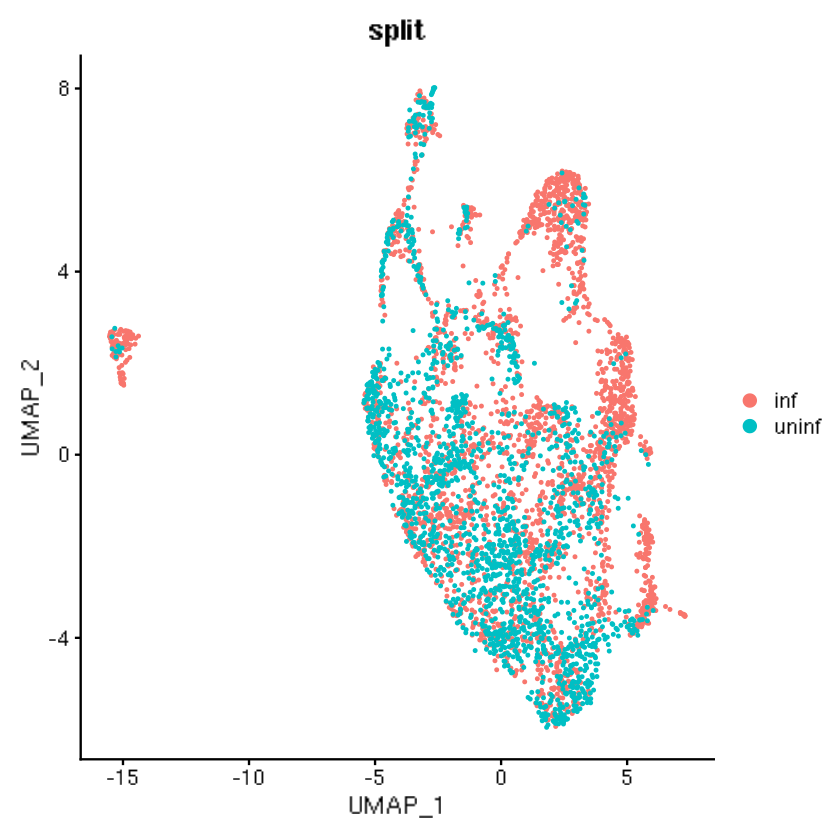

In [6]:
# Visualization
p1 <- DimPlot(my, reduction = "umap", group.by = "split")
p2 <- DimPlot(my, reduction = "umap", label = TRUE, repel = TRUE)
p1

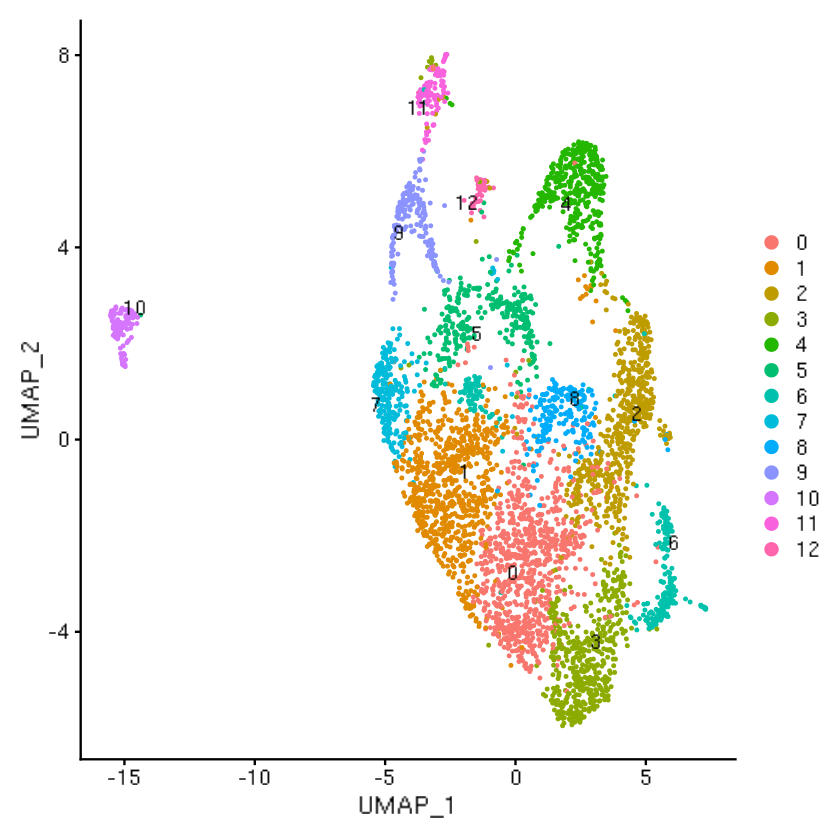

In [7]:
p2

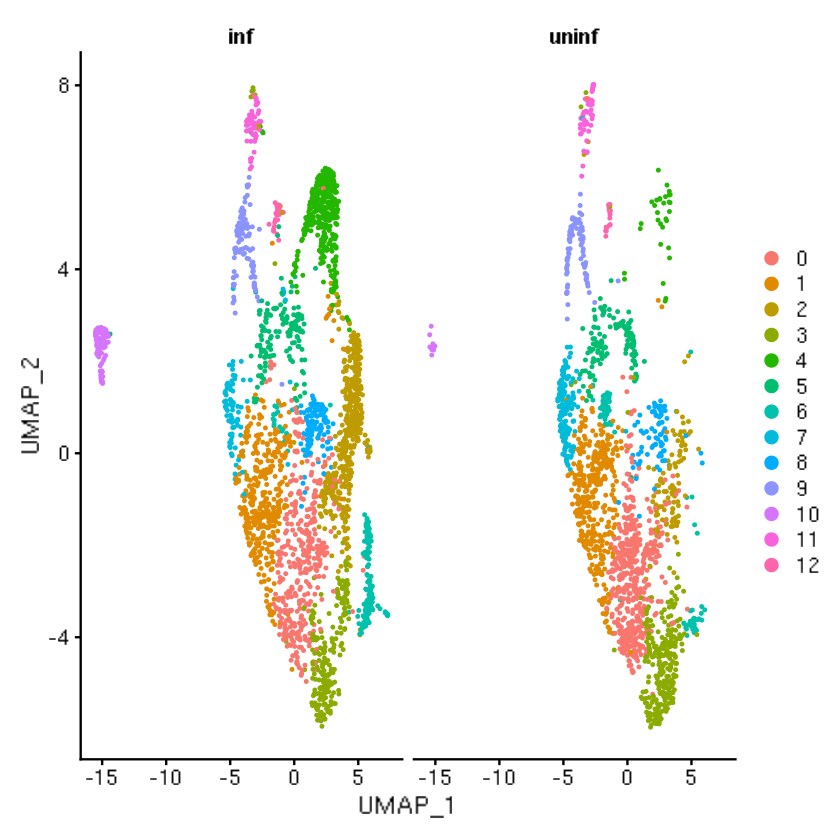

In [8]:
DimPlot(my, reduction = "umap", split.by = "split")

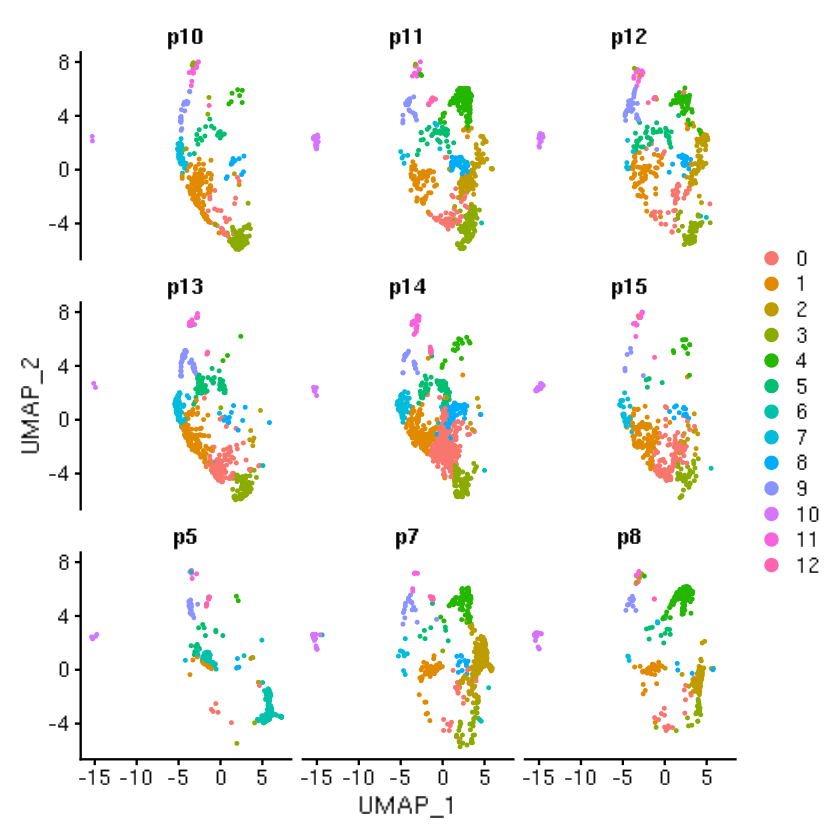

In [9]:
DimPlot(my, reduction = "umap", split.by = "patient", ncol = 3)

# Naming clusters with cell type markers

In [10]:
dc <- c('FLT3', 'CD207', 'SERPINF2', 'PPP1R14A', 'LSP1', 'MZT2A', 'SLC38A1', 'CST7', 'DUSP4', 'FAM118A', 'TOMM34', 'MCOLN2')
macro <- c('CD14', 'FCGR3A', 'PLA2G7', 'CFD', 'C1QB', 'CTSD', 'GLUL', 'C1QA', 'C1QC', 'ACP5', 'CTSC', 'PLD3', 'MS4A4A',
                    'VSIG4', 'C5AR1')
moDC <- c('CD163', 'SDS', 'FPR3', 'MERTK', 'MAFB', 'DAB2', 'SLCO2B1', 'TFRC')

In [ ]:
for (i in macro) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in dc) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in moDC) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

In [11]:
Inf.Macrophages <- c('CCL4L2', 'CXCL2', 'CXCL3', 'CD83', 'CXCL8', 'SOD2', 'TXN', 'CCL3', 'CCL3L3', 'CCL4', 'NFKBIA', 'CD44', 'PKM',
                    'S100A6', 'IL1B', 'PLAUR', 'IER3', 'C15orf48', 'G0S2', 'S100A9', 'S100A8')
Resident_macrophages <- c('SEPP1', 'SLC40A1', 'DNASE1L3', 'RGS2', 'JAML', 'VSIG4', 'CPVL', 'CLEC10A', 'RNASE6', 'C1QA', 'C1QB',
                          'C1QC')
Activated_DC <- c('IDO1', 'MARCKS', 'CCR7', 'GPR157', 'POGLUT1', 'LAMP3', 'CCL19', 'CCL22', 'CCL17', 'EBI3', 'CD274', 'FSCN1', 'DAPP1', 
                  'ANXA6', 'NUB1', 'ERICH1', 'TUBA1C', 'KDM2B', 'TNFAIP2', 'GRSF1', 'CD40', 'CRIP1', 'CD86', 'IL7R', 'MARCKSL1', 
                  'BIRC3', 'ID2', 'CFLAR', 'CD83')
pDC <- c('MARCKSL1', 'BIRC3', 'ID2', 'CFLAR', 'CD83', 'IRF7', 'IRF8', 'PPP1R14B', 'C12orf75', 'ALOX5AP', 'IL3RA', 'PTGDS', 
         'CLIC3', 'SCT', 'GZMB', 'TCL1A', 'TCF4', 'LILRA4')
DC2 <- c('MRC1', 'CLEC10A', 'FCER1A', 'CD1D', 'CFP', 'CD1E', 'CD1C', 'LILRA5', 'CLEC4A', 'FCGR2B', 'FGR', 'CASP1', 'AVPI1', 'FCN1')
DC1 <- c('CPNE3', 'CCND1', 'S100B', 'TMEM14A', 'C1orf21', 'UBE2C', 'ENPP1', 'XCR1', 'CADM1', 'CLEC9A', 'CLNK', 'KIAA0101', 
         'BATF3', 'IDO1', 'ID2')
moDC <- c('CD209', 'MMP19', 'STAB1', 'DAB2', 'PDK4', 'SEPP1', 'C5AR2', 'MERTK', 'ABHD5', 'TFRC', 'C1QC', 'CD163', 'CD207', 'MRC1', 
          'CLEC10A')

In [ ]:
for (i in Inf.Macrophages) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Resident_macrophages) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in Activated_DC) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in pDC) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in DC2) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in DC1) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in moDC) {
    print(FeaturePlot(my, features = i, min.cutoff = "q9"))
}

## Representative markers of each cluster

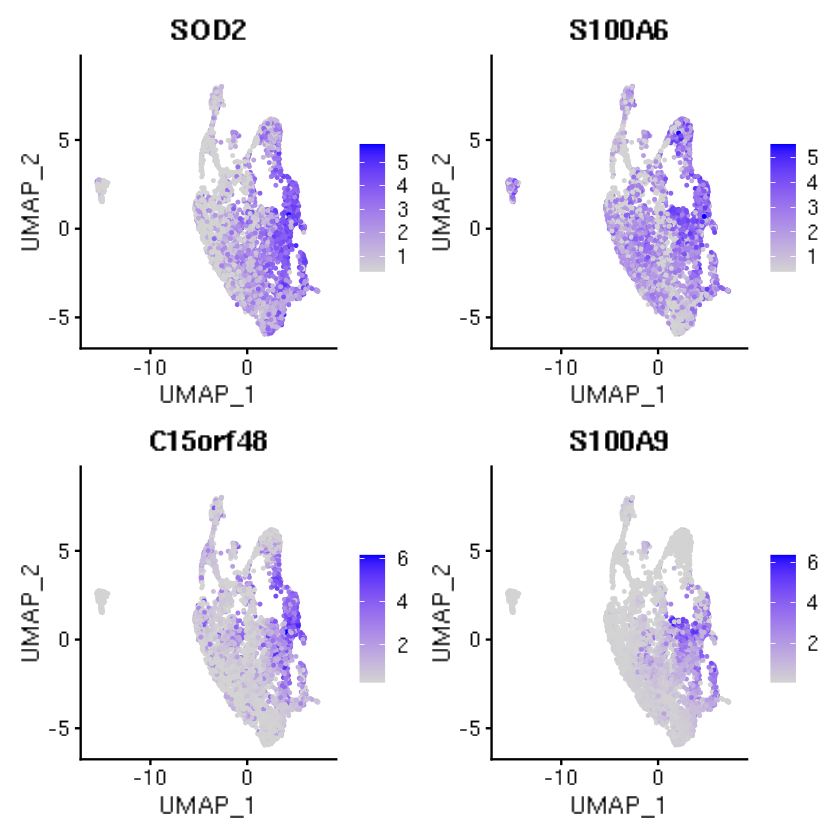

In [12]:
#inf.Ma
FeaturePlot(my, features = c('SOD2','S100A6', 'C15orf48', 'S100A9'), min.cutoff = "q9")

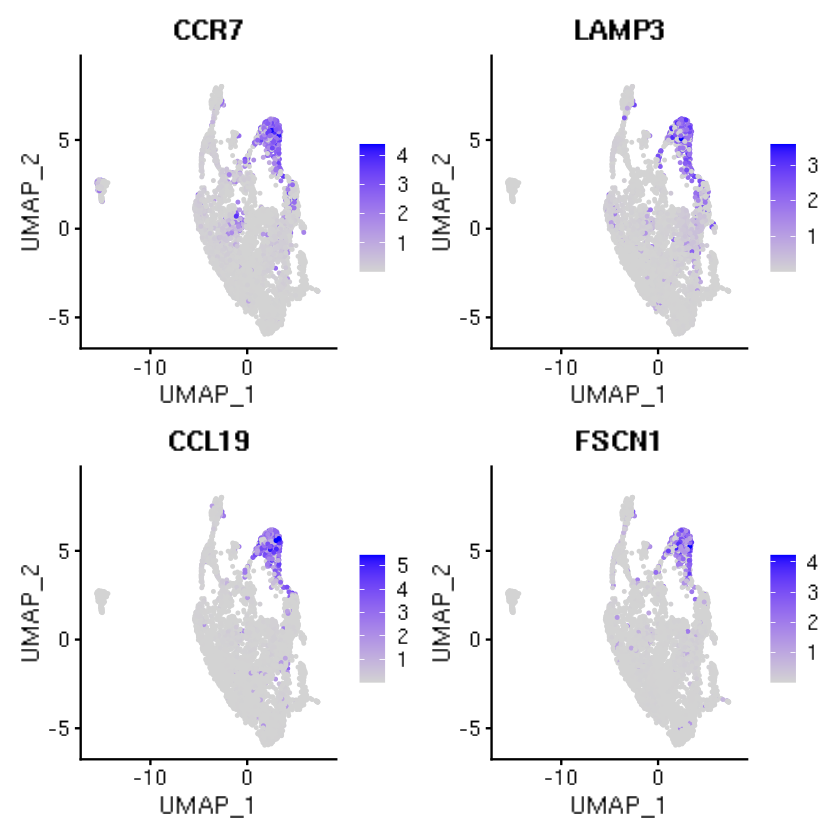

In [13]:
#acDC
FeaturePlot(my, features = c("CCR7", "LAMP3", "CCL19", "FSCN1"), min.cutoff = "q9")

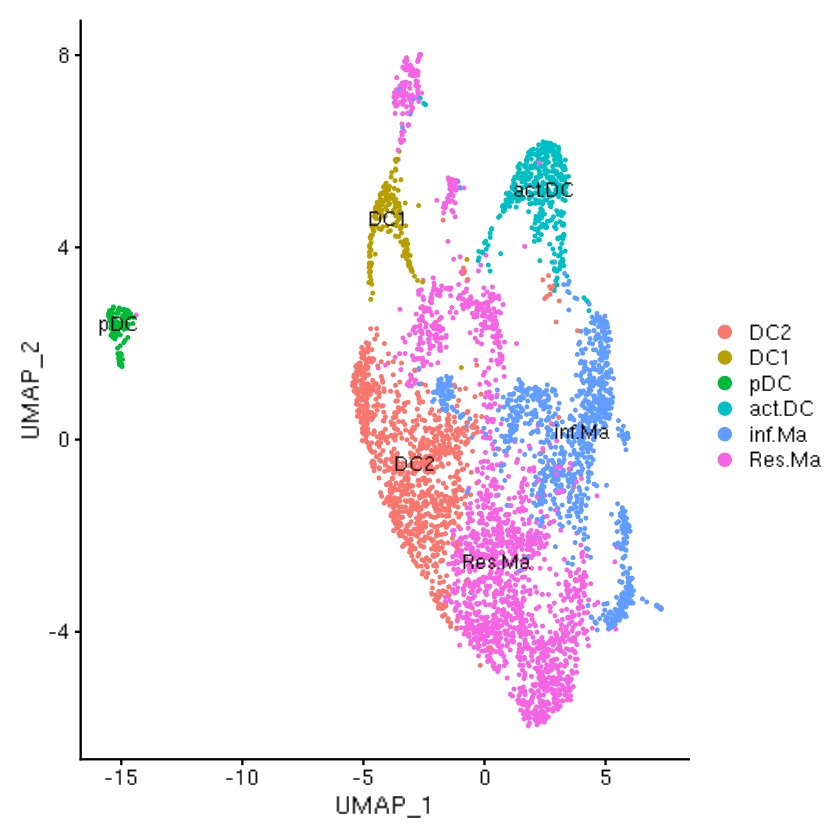

In [14]:
#Idents(my) <- my$seurat_clusters
my <- RenameIdents(my, `1` = "DC2", `7` = "DC2", `9` = "DC1", 
                   `10` = "pDC",
                   `4` = "act.DC",
                   `8` = "inf.Ma", `2` = "inf.Ma", `6` = "inf.Ma", 
                   `11` = "Res.Ma", `12` = "Res.Ma", `5` = 'Res.Ma', `0` = "Res.Ma", `3` = 'Res.Ma')
DimPlot(my, label = TRUE)

# Comparison of distributions of clusters

In [15]:
my$celltype <- Idents(my)
head(my@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ep,percent.he,split,patient,integrated_snn_res.1.1,seurat_clusters,celltype,integrated_snn_res.0.5
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
inf_GSE134809_69_AAAGACGAATGCTG-1,GSE134809_69,1858,644,2.744887,0.861141012,0,inf,p5,10,3,Res.Ma,3
inf_GSE134809_69_AAAGATCTGTATCG-1,GSE134809_69,2731,869,1.794215,0.000000000,0,inf,p5,14,6,inf.Ma,6
inf_GSE134809_69_AAAGCAGAGGTTCA-1,GSE134809_69,3655,873,1.696306,0.000000000,0,inf,p5,14,9,DC1,9
inf_GSE134809_69_AAATCTGAGCTAAC-1,GSE134809_69,12281,1635,1.538963,0.008142659,0,inf,p5,10,12,Res.Ma,12
inf_GSE134809_69_AACAAACTGGTCAT-1,GSE134809_69,1756,616,3.302961,0.000000000,0,inf,p5,14,9,DC1,9


### inf vs uninf

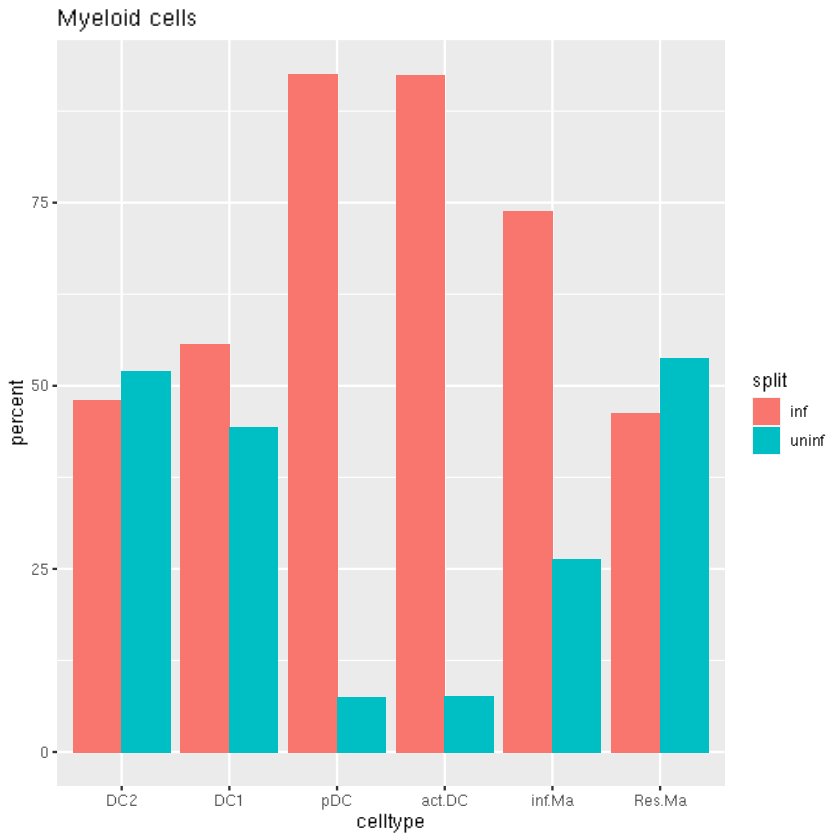

In [16]:
my@meta.data %>%
  group_by(celltype, split) %>%
  count() %>%
  group_by(celltype) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup() %>%
  ggplot(aes(x=celltype, y=percent, fill=split)) +
  geom_col(position = 'dodge') +
  ggtitle("Myeloid cells")

### comparison between inf and uninf tissues by patient

In [17]:
a <- my@meta.data %>%
  filter(split == 'inf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()
b <- my@meta.data %>%
  filter(split == 'uninf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()
#c <- rbind(a,b)

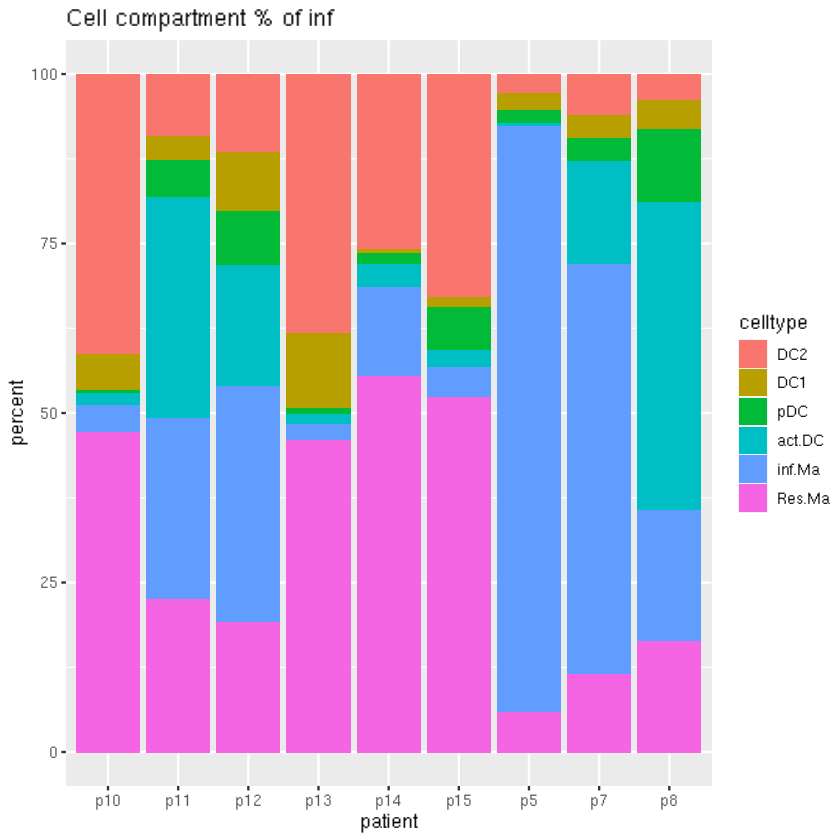

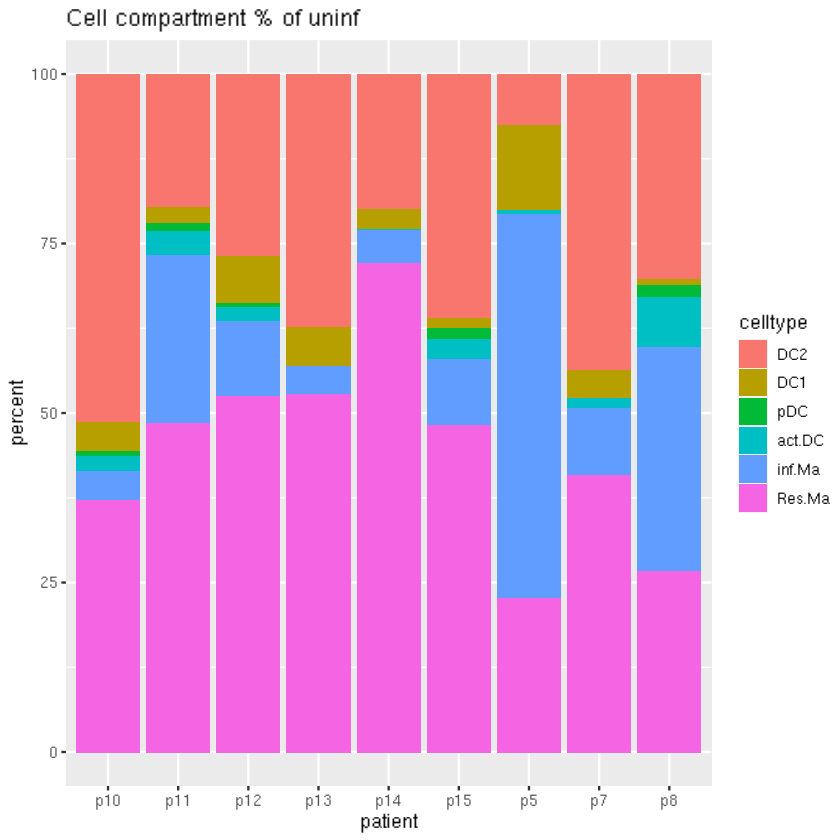

In [18]:
ggplot(a, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of inf")
ggplot(b, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of uninf")

In [ ]:
saveRDS(my, file = "./MNP_pDC_cluster_name.rds")

In [ ]:
infMa_actDC <- subset(my, idents = c("inf.Ma", 'act.DC'))
saveRDS(infMa_actDC, file = "./infMa_actDC.rds")